In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stock_data = pd.read_csv('./data/google/google12m.csv')
stock_data.head()

,date,close,volume,open,high,low
0,2019/08/15,1167.26,1224739,1163.50,1175.84,1162.1100
1,2019/08/14,1164.29,1578668,1176.31,1182.30,1160.5400
2,2019/08/13,1197.27,1318009,1171.46,1204.78,1171.4600
3,2019/08/12,1174.71,1003187,1179.21,1184.96,1167.6723
4,2019/08/09,1188.01,1065658,1197.99,1203.88,1183.6030


In [2]:
import math

stock_data['average'] = (stock_data['high'] + stock_data['low']) / 2
stock_data.head()

,date,close,volume,open,high,low,average
0,2019/08/15,1167.26,1224739,1163.50,1175.84,1162.1100,1168.97500
1,2019/08/14,1164.29,1578668,1176.31,1182.30,1160.5400,1171.42000
2,2019/08/13,1197.27,1318009,1171.46,1204.78,1171.4600,1188.12000
3,2019/08/12,1174.71,1003187,1179.21,1184.96,1167.6723,1176.31615
4,2019/08/09,1188.01,1065658,1197.99,1203.88,1183.6030,1193.74150


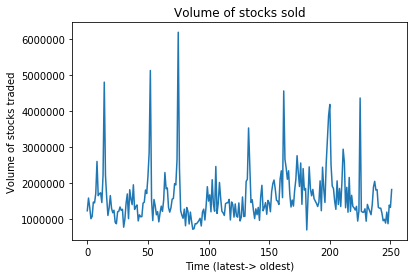

In [3]:
input_feature = stock_data.iloc[:,[2,6]].values

plt.plot(input_feature[:,0])
plt.title("Volume of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Volume of stocks traded")
plt.show()

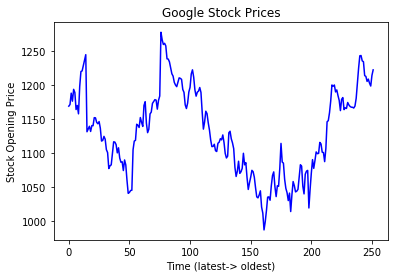

In [4]:
plt.plot(input_feature[:,1], color='blue')
plt.title("Google Stock Prices")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
input_data = sc.fit_transform(input_feature)
print(input_data[0+2, :])
print('\n')
print(input_data)

[0.1138508  0.69183656]


[[0.09690256 0.62603656]
 [0.16121553 0.63443985]
 [0.1138508  0.69183656]
 [0.05664402 0.65126757]
 [0.06799572 0.71115725]
 [0.14110534 0.69491261]
 [0.13680368 0.60905641]
 [0.18496632 0.62949067]
 [0.34634085 0.58725082]
 [0.173281   0.72551846]
 [0.1829922  0.8011137 ]
 [0.18788824 0.80443635]
 [0.138428   0.83263034]
 [0.2784309  0.86258317]
 [0.74761381 0.88655558]
 [0.27590366 0.49658464]
 [0.16329304 0.51096818]
 [0.07308909 0.52421754]
 [0.11091379 0.4980797 ]
 [0.17367676 0.52775758]
 [0.10899401 0.52702723]
 [0.0869644  0.56791809]
 [0.09945888 0.56697294]
 [0.03858062 0.54401425]
 [0.03134723 0.53696855]
 [0.09160204 0.54819012]
 [0.09412728 0.51445667]
 [0.11609693 0.44945575]
 [0.09902495 0.45288409]
 [0.10413486 0.47321352]
 [0.01372812 0.45877842]
 [0.05456669 0.40605594]
 [0.13574612 0.39117919]
 [0.18207274 0.31056087]
 [0.05687843 0.32434296]
 [0.20340913 0.32918903]
 [0.15544528 0.38579524]
 [0.12796742 0.44570091]
 [0.22825309 0.44429177]

In [6]:
lookback = 30

X = []
y_volume = []
y_average = []

for i in range(len(stock_data) - lookback - 1):
    t = []
    for j in range(lookback):
        t.append(input_data[i + j, :])
    X.append(t)
    y_volume.append(input_data[i + lookback, 0])
    y_average.append(input_data[i + lookback, 1])


In [7]:
X = np.array(X)
y_volume = np.array(y_volume)
y_average = np.array(y_average)
test_size = int(1/7 * len(X))

X_train = X[test_size + 1:]
X_test = X[:test_size]
y_volume_train = y_volume[test_size + 1:]
y_volume_test = y_volume[:test_size]
y_average_train = y_average[test_size + 1:]
y_average_test = y_average[:test_size]

print(X_train.shape)
print(X_test.shape)
print(y_volume_train.shape)

(189, 30, 2)
(31, 30, 2)
(189,)


In [8]:
from keras import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(units=30, return_sequences=True, input_shape=(X.shape[1], 2)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 30)            3960      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 30)            7320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.fit(X, y_average, epochs=200, batch_size=64)

Epoch 1/200
221/221 [==============================] - 2s 8ms/step - loss: 0.2561
Epoch 2/200
221/221 [==============================] - 0s 1ms/step - loss: 0.1434
Epoch 3/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0493
Epoch 4/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0381
Epoch 5/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0375
Epoch 6/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 7/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0297
Epoch 8/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0264
Epoch 9/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 10/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0216
Epoch 11/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0205
Epoch 12/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0187
Epoch 13/200


221/221 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 100/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 101/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 102/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 103/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 104/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 105/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 106/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 107/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 108/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 109/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 110/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 

221/221 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 197/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 198/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 199/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 200/200
221/221 [==============================] - 0s 1ms/step - loss: 0.0039


In [12]:
predicted_value = model.predict(X_test)
print(predicted_value)

[[0.47682947]
 [0.45713478]
 [0.42756104]
 [0.41535762]
 [0.38163576]
 [0.34381405]
 [0.34731156]
 [0.37169692]
 [0.41133144]
 [0.45355222]
 [0.4505071 ]
 [0.42177978]
 [0.40954623]
 [0.37254748]
 [0.3424291 ]
 [0.32701972]
 [0.30409122]
 [0.317032  ]
 [0.32554612]
 [0.30852097]
 [0.26446167]
 [0.24139717]
 [0.25129882]
 [0.32819486]
 [0.3785969 ]
 [0.41433498]
 [0.45153874]
 [0.49979588]
 [0.5209242 ]
 [0.5206871 ]
 [0.5240541 ]]


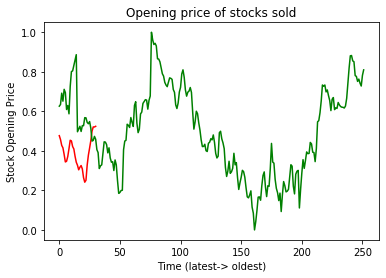

In [13]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[:,1], color='green')
plt.title("Opening price of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()